In [1]:
import keras as kr
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sea
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageOps
from sklearn.preprocessing import LabelBinarizer as Enc

Using TensorFlow backend.


In [10]:
from keras.datasets import mnist

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def process(images):
    data =  images.reshape(images.shape[0], 28, 28, 1)
    data = data.astype('float32')
    data = data/255
    return data
X = process(X_train)
val_x = process(X_test)


In [65]:
enc = Enc()
y = enc.fit_transform(y_train.reshape(-1, 1))
val_y = enc.fit_transform(y_test.reshape(-1, 1))

In [48]:
def show_image(image):
    plt.imshow(image)
    plt.show()

In [75]:
def train(model, epochs =1 ):
    callbacks = model.fit(X, y,batch_size = 32,epochs = epochs, verbose= 1, validation_data= (val_x, val_y)) 
    result = pd.DataFrame(callbacks.history)
    return result

In [77]:
def create_model():
    from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    
    model = kr.Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1), data_format = 'channels_last'))
    model.add(Conv2D(32, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

model = create_model()


In [197]:
test2 = train(model, 1)
test = test.append(test2)
test = test.reset_index()
test[['acc', 'val_acc']].plot()
plt.show()
test[['loss', 'val_loss']].plot()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
18368/60000 [========>.....................] - ETA: 52s - loss: 0.0169 - acc: 0.9941

KeyboardInterrupt: 

In [257]:
ImageOps.invert(im.convert('L')).convert('1').resize((28,28))

[4]


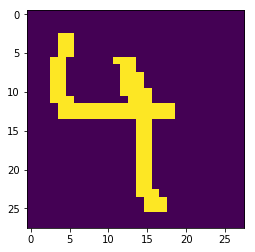

In [256]:
def pre(im):
    im = im.convert('L')
    im = ImageOps.invert(im)
    im = im.convert('1')
    im = im.resize((28, 28))
    x = np.array(im.getdata()).reshape(1,28,28,1)
    x = process(x)
    prediction = model.predict(x)
    word = enc.inverse_transform(prediction)
    print(word)
    return show_image( x.reshape((28,28)))
im = Image.open('test.PNG')
pre(im)

In [194]:
def predict(image_location, X):
    prediction = model.predict(X[image_location: image_location + 1])
    word = enc.inverse_transform([prediction])
    print(word[0])
    return show_image(X[image_location].reshape((28,28)))